# Comparison between VRS and VCZT

In this example, we will analyze how VCZT algorithm produces better results than in VRS when the region of interest in the focus of a lens.

In [1]:
from diffractio import mm, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY


In [2]:
diameter = 2 * mm
x0 = np.linspace(-diameter / 2, diameter / 2, 512)
y0 = np.linspace(-diameter / 2, diameter / 2, 512)
wavelength = 0.6238 * um

In [3]:
focal = 25 * mm
limit = 80 * um

In [4]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter / 2, diameter / 2), focal=(focal, focal))

u1 = u0 * t0

In [5]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_polarization(u1, v=[(1 - 1j) / 2, (1 + 1j) / 2])

**RS**

CPU times: user 501 ms, sys: 185 ms, total: 686 ms
Wall time: 497 ms


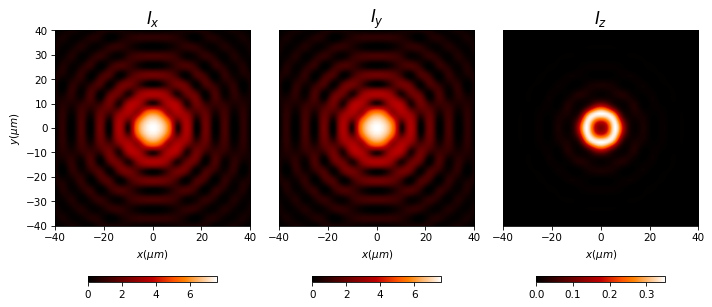

In [6]:
%%time
EM1_rs = EM0.VRS(z=focal)
EM1_rs.cut_resample(x_limits=(-limit/2, limit/2),
                          y_limits=(-limit/2, limit/2),
                          num_points=(128, 128),
                          new_field=False,
                          interp_kind=(3, 1))

EM1_rs.draw('intensities', logarithm=1e-1)

**VCZT**

CPU times: user 181 ms, sys: 188 ms, total: 370 ms
Wall time: 147 ms


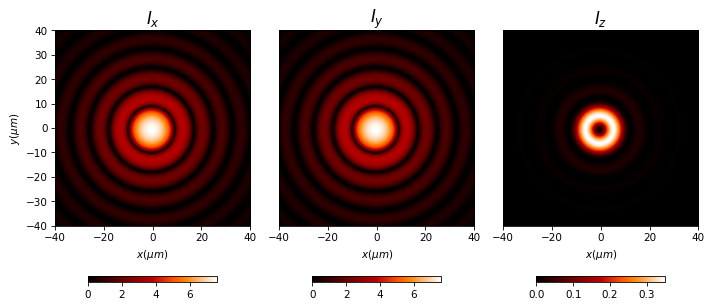

In [7]:
%%time
xout = np.linspace(-limit/2, limit/2, 128)
yout = np.linspace(-limit/2, limit/2, 128)
EM1_czt = EM0.VCZT(z=focal, xout=xout, yout=yout)
EM1_czt.draw('intensities', logarithm=1e-1)